In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Quick look at data
print(titanic.head())
print(titanic.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

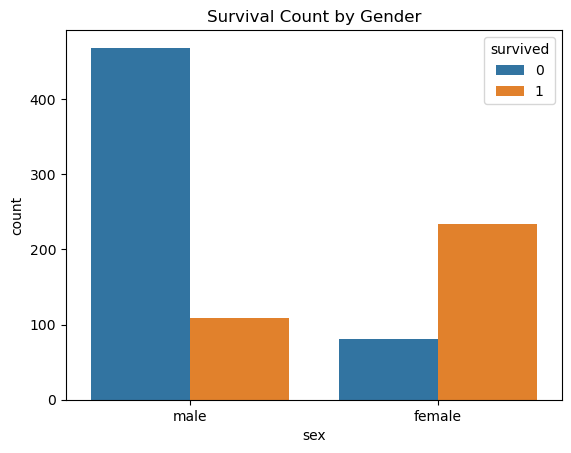

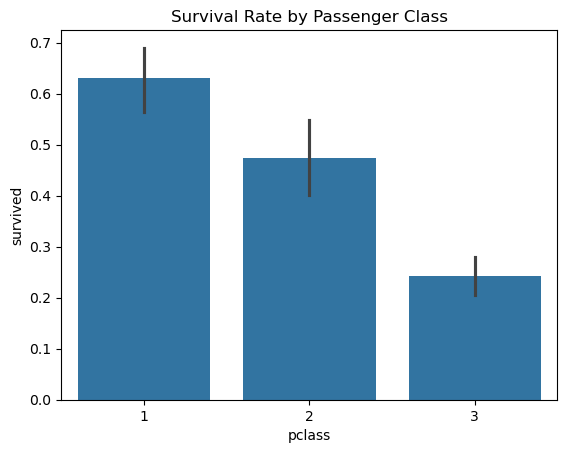

In [4]:
# Survival count by sex
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Survival Count by Gender')
plt.show()

# Survival rate by passenger class
sns.barplot(data=titanic, x='pclass', y='survived')
plt.title('Survival Rate by Passenger Class')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Select features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

# Drop rows with missing values for simplicity
titanic_clean = titanic[features + [target]].dropna()

# Encode categorical variables
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 0, 'female': 1})
titanic_clean['embarked'] = titanic_clean['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Split features and target
X = titanic_clean[features]
y = titanic_clean[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


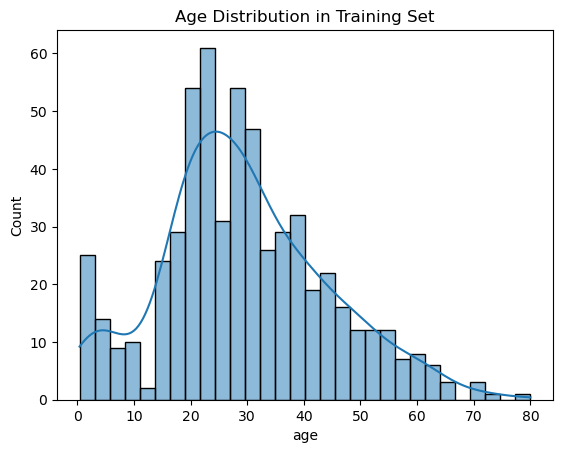

In [6]:
sns.histplot(X_train['age'], bins=30, kde=True)
plt.title('Age Distribution in Training Set')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)


SVC(random_state=42)

Accuracy: 0.8181818181818182

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        85
           1       0.82      0.71      0.76        58

    accuracy                           0.82       143
   macro avg       0.82      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143



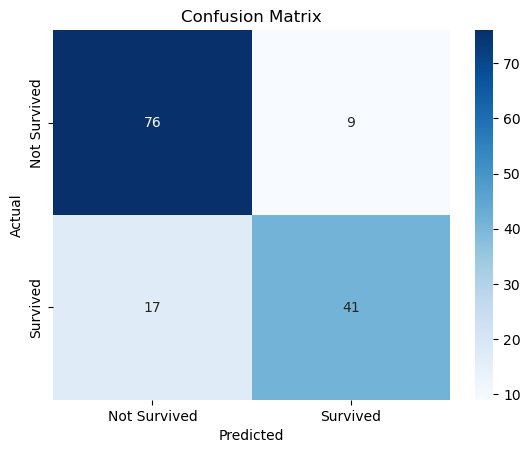

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
